# Análisis y Predicción de Rendimiento en Pruebas Saber Pro


## Introducción
Las Pruebas Saber Pro son exámenes estandarizados administrados en Colombia para evaluar la calidad y el nivel de conocimiento y competencias de los estudiantes de educación superior. Estas pruebas, que abarcan cinco componentes genéricos (Inglés, Lectura Crítica, Competencias Ciudadanas, Razonamiento Cuantitativo y Comunicación Escrita), son fundamentales para los esfuerzos del Gobierno colombiano en monitorear y mejorar la calidad de la educación superior en el país.

## Objetivo del proyecto
El objetivo principal de este proyecto es desarrollar un modelo de clasificación que prediga el desempeño de cada estudiante en las Pruebas Saber Pro, categorizándolo como bajo, medio-bajo, medio-alto o alto.

## Enfoque Actual: Limpieza, Pre-prosesamiento de Datos y Modelo

En esta etapa del proyecto, nos centraremos en tres aspectos :

En esta etapa del proyecto, nos enfocaremos en la limpieza y preprocesamiento de los datos para asegurar que el modelo se entrene y pruebe de manera efectiva en ambos conjuntos de datos, de entrenamiento y de prueba.

Limpieza de Datos: Prepararemos el conjunto de datos de entrenamiento, identificando y corrigiendo problemas como valores faltantes, outliers y formatos inconsistentes. Esta limpieza también se extiende al conjunto de datos de prueba, que debe estar en las mismas condiciones que el de entrenamiento para una evaluación justa. Utilizaremos métodos adecuados de imputación para los valores NaN, manteniendo la distribución original de los datos y evitando sesgos.

Selección de Variables: Realizaremos un análisis exhaustivo de las características disponibles para identificar las variables más relevantes en la predicción de la columna RENDIMIENTO_GLOBAL. Seleccionaremos aquellas variables que ofrezcan el mayor poder predictivo, reduciendo la dimensionalidad del modelo y optimizando su rendimiento.

Entrenamiento y Prueba del Modelo: Tras el preprocesamiento, entrenaremos el modelo con el conjunto de datos de entrenamiento y evaluaremos su desempeño con el conjunto de datos de prueba. Este paso nos permitirá validar la capacidad predictiva del modelo y ajustar sus parámetros para obtener resultados óptimos en términos de precisión y generalización.

## Estructura del Notebook

Este notebook guiará a través del proceso de limpieza de datos y selección de variables, sentando las bases para el desarrollo del modelo predictivo. Las secciones incluirán:

- Carga y exploración inicial de datos
- Exploración del Dataset
- Limpieza de datos
- Resultados de la limpieza y preprocesamiento de datos
- Entremiento y prueba del Modelo

# Limpieza y Pre-procesamiento de los datos

## Carga y exploración inicial de datos

### Instalación de librerias necesarias

In [3]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


### Carga del dataset desde Kaggle

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 70% 14.0M/20.1M [00:00<00:00, 72.5MB/s]
100% 20.1M/20.1M [00:00<00:00, 84.5MB/s]


### Descomprimir data


In [5]:
!unzip udea*.zip > /dev/null

In [6]:
!wc *.csv

   296787    296790  21913069 datos_limpios_test_label_pro_aca.csv
   650340    650343  49315549 datos_limpios_train_label_pro_aca.csv
   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  2233202  16475704 244106097 total


### Instalaciones e importaciones

In [7]:
!pip install fuzzywuzzy
!pip install python-Levenshtein
!pip install pandas scikit-learn fuzzywuzzy
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=829c4c850a51575d9e66ebc697c746255d36dce10d57c4209415c9a0f61b82cb
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [8]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from fuzzywuzzy import fuzz
from collections import defaultdict
from ydata_profiling import ProfileReport
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import numpy as np
import joblib


### Exploración del dataset


#### Visualización de la data de entrenamiento y test

In [9]:
z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

p = pd.read_csv('test.csv', index_col=0)
print ("shape of loaded dataframe", p.shape)

shape of loaded dataframe (692500, 12)
shape of loaded dataframe (296786, 11)


In [ ]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [ ]:
p.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Primaria completa,Si
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,No
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,No
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Primaria incompleta,No
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No


## Limpieza de datos


### Eliminación de columnas inaportantes

In [ ]:
columnas = [
    'ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
    'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
    'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
    'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO', 'RENDIMIENTO_GLOBAL'
]

In [ ]:
tabla_valores = pd.DataFrame({
    'Columna': columnas,
    'Valores_Unicos': [z[col].nunique() for col in columnas],
})

tabla_valores.reset_index(drop=True, inplace=True)

markdown_tabla = tabla_valores.to_markdown()

print(markdown_tabla)

|    | Columna                        |   Valores_Unicos |
|---:|:-------------------------------|-----------------:|
|  0 | ID                             |           692500 |
|  1 | PERIODO                        |                9 |
|  2 | ESTU_PRGM_ACADEMICO            |              948 |
|  3 | ESTU_PRGM_DEPARTAMENTO         |               31 |
|  4 | ESTU_VALORMATRICULAUNIVERSIDAD |                8 |
|  5 | ESTU_HORASSEMANATRABAJA        |                5 |
|  6 | FAMI_ESTRATOVIVIENDA           |                7 |
|  7 | FAMI_TIENEINTERNET             |                2 |
|  8 | FAMI_EDUCACIONPADRE            |               12 |
|  9 | FAMI_EDUCACIONMADRE            |               12 |
| 10 | ESTU_PAGOMATRICULAPROPIO       |                2 |
| 11 | RENDIMIENTO_GLOBAL             |                4 |


In [ ]:
tabla_nulls = pd.DataFrame({
    'Columna': columnas,
    'Valores_NA': z[columnas].isna().sum().values
})


total_datos = 692500


tabla_nulls['Porcentaje'] = (tabla_nulls['Valores_NA'] / total_datos) * 100


markdown_tabla = tabla_nulls.to_markdown()

print(markdown_tabla)

|    | Columna                        |   Valores_NA |   Porcentaje |
|---:|:-------------------------------|-------------:|-------------:|
|  0 | ID                             |            0 |     0        |
|  1 | PERIODO                        |            0 |     0        |
|  2 | ESTU_PRGM_ACADEMICO            |            0 |     0        |
|  3 | ESTU_PRGM_DEPARTAMENTO         |            0 |     0        |
|  4 | ESTU_VALORMATRICULAUNIVERSIDAD |         6287 |     0.90787  |
|  5 | ESTU_HORASSEMANATRABAJA        |        30857 |     4.45588  |
|  6 | FAMI_ESTRATOVIVIENDA           |        32137 |     4.64072  |
|  7 | FAMI_TIENEINTERNET             |        26629 |     3.84534  |
|  8 | FAMI_EDUCACIONPADRE            |        23178 |     3.347    |
|  9 | FAMI_EDUCACIONMADRE            |        23664 |     3.41718  |
| 10 | ESTU_PAGOMATRICULAPROPIO       |         6498 |     0.938339 |
| 11 | RENDIMIENTO_GLOBAL             |            0 |     0        |


In [ ]:
columna_a_excluir = 'RENDIMIENTO_GLOBAL'
columnas_filtradas = [col for col in columnas if col != columna_a_excluir]

In [ ]:
tabla_valores = pd.DataFrame({
    'Columna': columnas_filtradas,
    'Valores_Unicos': [p[col].nunique() for col in columnas_filtradas],
})

tabla_valores.reset_index(drop=True, inplace=True)

markdown_tabla = tabla_valores.to_markdown()

print(markdown_tabla)

|    | Columna                        |   Valores_Unicos |
|---:|:-------------------------------|-----------------:|
|  0 | ID                             |           296786 |
|  1 | PERIODO                        |                9 |
|  2 | ESTU_PRGM_ACADEMICO            |              919 |
|  3 | ESTU_PRGM_DEPARTAMENTO         |               31 |
|  4 | ESTU_VALORMATRICULAUNIVERSIDAD |                8 |
|  5 | ESTU_HORASSEMANATRABAJA        |                5 |
|  6 | FAMI_ESTRATOVIVIENDA           |                7 |
|  7 | FAMI_TIENEINTERNET             |                2 |
|  8 | FAMI_EDUCACIONPADRE            |               12 |
|  9 | FAMI_EDUCACIONMADRE            |               12 |
| 10 | ESTU_PAGOMATRICULAPROPIO       |                2 |


In [ ]:
p['ESTU_PRGM_ACADEMICO'] = p['ESTU_PRGM_ACADEMICO'].apply(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)

In [ ]:
tabla_nulls = pd.DataFrame({
    'Columna': columnas_filtradas,
    'Valores_NA_p': p[columnas_filtradas].isna().sum().values
})

total_datos = 296786

tabla_nulls['Porcentaje_NA_p'] = (tabla_nulls['Valores_NA_p'] / total_datos) * 100

# Convert the table to markdown
markdown_tabla = tabla_nulls.to_markdown()

# Print the markdown table
print(markdown_tabla)


|    | Columna                        |   Valores_NA_p |   Porcentaje_NA_p |
|---:|:-------------------------------|---------------:|------------------:|
|  0 | ID                             |              0 |          0        |
|  1 | PERIODO                        |              0 |          0        |
|  2 | ESTU_PRGM_ACADEMICO            |              0 |          0        |
|  3 | ESTU_PRGM_DEPARTAMENTO         |              0 |          0        |
|  4 | ESTU_VALORMATRICULAUNIVERSIDAD |           2723 |          0.917496 |
|  5 | ESTU_HORASSEMANATRABAJA        |          13379 |          4.50796  |
|  6 | FAMI_ESTRATOVIVIENDA           |          13795 |          4.64813  |
|  7 | FAMI_TIENEINTERNET             |          11539 |          3.88799  |
|  8 | FAMI_EDUCACIONPADRE            |           9993 |          3.36707  |
|  9 | FAMI_EDUCACIONMADRE            |          10223 |          3.44457  |
| 10 | ESTU_PAGOMATRICULAPROPIO       |           2807 |          0.945799 |

 Se eliminan las columnas que se consideran inaportantes para predecir la variable de interes sin importar el valor de la correlación.

In [ ]:
z = z.drop(columns=['ID'])
z = z.drop(columns=['ESTU_PAGOMATRICULAPROPIO'])
z = z.drop(columns=['ESTU_VALORMATRICULAUNIVERSIDAD'])
z = z.drop(columns=['PERIODO'])


p = p.drop(columns=['ESTU_PAGOMATRICULAPROPIO'])
p = p.drop(columns=['ESTU_VALORMATRICULAUNIVERSIDAD'])
p = p.drop(columns=['PERIODO'])

#### Elección de columnas a eliminar basado en valores Nan

Eliminar columnas con un porcentaje de valores **NaN superior al 70%** en un dataset es una práctica común en la limpieza de datos, ya que indica que la mayoría de los datos en esa columna están ausentes. Esto puede comprometer la calidad y la integridad del análisis posterior, ya que un alto porcentaje de datos faltantes sugiere que la columna puede no ser representativa o útil para los objetivos del estudio.

In [ ]:
null_percentage = z.isnull().mean() * 100

high_null_columns = null_percentage[null_percentage > 70]

print("Columnas con más del 70% de valores nulos:")
print(high_null_columns)


Columnas con más del 70% de valores nulos:
Series([], dtype: float64)


In [ ]:
null_percentage = p.isnull().mean() * 100

high_null_columns = null_percentage[null_percentage > 70]

print("Columnas con más del 70% de valores nulos:")
print(high_null_columns)

Columnas con más del 70% de valores nulos:
Series([], dtype: float64)


No hay porcentajes demasiado significativos en las columnas con valores null para ser eliminadas por este criterio

### Conversión variables categoricas a numericas y reemplazo de datos y Nan

#### **Variables Categoricas a numericas**

Una **variable categórica** es aquella que representa diferentes categorías o grupos. Dentro de las variables categóricas, existen dos tipos principales:

- Variable categórica nominal:
  Representa categorías sin un orden intrínseco. No hay una jerarquía entre las categorías.
  Ejemplos: Colores (rojo, azul, verde), ciudades (Bogotá, Lima, Madrid).

- Variable categórica ordinal:
  Representa categorías que sí tienen un orden o jerarquía entre ellas, pero las diferencias entre los niveles no son cuantificables.
  Ejemplos: Niveles de satisfacción (bajo, medio, alto), grados académicos (secundaria, licenciatura, maestría).


Para convertir **variables categóricas** en valores numéricos durante la limpieza y estandarización de datos, es importante considerar su tipo. **Las variables categóricas nominales,** al no tener un orden intrínseco, se transforman típicamente mediante **One-Hot Encoding**, que crea columnas binarias para cada categoría, o **Label Encoding** en casos binarios. Las **variables categóricas ordinales**, por su parte, siguen un orden lógico, por lo que se transforman usando Label Encoding, asignando un número que respete esa jerarquía. Esta distinción asegura que las transformaciones numéricas representen adecuadamente la naturaleza de las categorías en el análisis posterior.

**Dentro del dataset en variables categoricas ordinales que quedan tenemos**
- FAMI_EDUCACIONPADRE, FAMI_EDUCACIONPADRE, RENDIMIENTO_GLOBAL,  FAMI_ESTRATOVIVIENDA, ESTU_HORASSEMANATRABAJA

**Dentro del dataset en variables categoricas nominales que quedan tenemos**
- FAMI_TIENEINTERNET, ESTU_PRGM_ACADEMICO , ESTU_PRGM_DEPARTAMENTO

#### **Valores Faltantes en Datasets de Entrenamiento y Prueba**

Es fundamental entender que el procesamiento de valores NaN debe abordarse de manera diferente en los datasets de entrenamiento y prueba, ya que cada uno tiene propósitos y restricciones distintas.

En el contexto de un dataset de prueba, no es posible eliminar filas basadas en la presencia de valores NaN, ya que esto alteraría el tamaño del dataset y podría llevar a la pérdida de información esencial para las predicciones o evaluaciones posteriores. Al ser un conjunto de prueba, mantener la integridad y el tamaño original es fundamental para obtener resultados consistentes y comparables con otros modelos o evaluaciones.

**Dataset de Entrenamiento**
En el dataset de entrenamiento, se optó por eliminar las filas que contenían valores NaN, ya que:

- Esta práctica es aceptable durante la fase de entrenamiento
- No compromete la integridad del modelo
- Permite trabajar con datos completos y limpios

**Dataset de Prueba**
Para el dataset de prueba, el enfoque debe ser más conservador:

Restricciones Importantes:

- No se pueden eliminar filas con valores NaN
- Es crucial mantener el tamaño original del dataset
- Se debe preservar toda la información para evaluaciones posteriores


**Solución Adoptada:**
Se implementó la Imputación Basada en Distribución de Probabilidades porque:

- Preserva la distribución original de las categorías
- Evita sesgos que podrían surgir al usar métodos simples (moda, mediana)
- Mantiene la diversidad de los datos
- Asegura una distribución más realista de los valores


Beneficios del Método: **texto en negrita**

- Evita la sobre-representación de categorías específicas
- Mantiene la integridad estadística del dataset
- Permite obtener resultados más precisos y confiables en la evaluación del modelo



##### Funciones

In [ ]:
def replace_nans_equilibrado(df, column_name):
    """
    Reemplaza los valores NaN de una columna con otros valores de la misma columna
    de manera proporcional a su frecuencia.

    :param df: DataFrame que contiene la columna.
    :param column_name: Nombre de la columna donde se reemplazarán los NaN.
    :return: DataFrame con los NaN reemplazados de manera equilibrada.
    """
    nan_count_before = df[column_name].isna().sum()
    values, counts = np.unique(df[column_name].dropna(), return_counts=True)

    if len(values) == 0:
        return df

    probabilities = counts / counts.sum()

    df[column_name] = df[column_name].apply(
        lambda x: np.random.choice(values, p=probabilities) if pd.isna(x) else x
    )

    nan_count_after = df[column_name].isna().sum()
    replaced_percentage = ((nan_count_before - nan_count_after) / len(df)) * 100

    print(f"Porcentaje de NaN reemplazado en '{column_name}': {replaced_percentage:.2f}%")

    return df

In [ ]:
def contar_nulos(df, column_name):
    null_count = df[column_name].isnull().sum()
    print(f'Total de valores nulos en {column_name}: {null_count}')


In [ ]:
def label_encode_column(df, column_name):
    """
    Aplica Label Encoding a una columna de un DataFrame, transformando los valores categóricos en numéricos.

    :param df: DataFrame que contiene la columna.
    :param column_name: Nombre de la columna a codificar.
    :return: DataFrame con la columna codificada y el codificador.
    """

    le = LabelEncoder()

    df[column_name] = le.fit_transform(df[column_name])

    mapping_df = pd.DataFrame({
        'Categoría Original': le.classes_,
        'Valor Numérico': le.transform(le.classes_)
    })

    print(f'Mapeo de categorías en la columna {column_name}:')
    print(mapping_df.to_markdown(index=False))


    return df, mapping_df


In [ ]:
def one_hot_encode_column(df, column_name):
    """
    Aplica One-Hot Encoding a una columna categórica de un DataFrame y devuelve el DataFrame transformado.

    :param df: DataFrame que contiene la columna.
    :param column_name: Nombre de la columna a codificar.
    :return: DataFrame con la columna codificada usando One-Hot Encoding.
    """
    one_hot_encoded_df = pd.get_dummies(df, columns=[column_name], prefix=column_name, drop_first=True)

    one_hot_encoded_df = one_hot_encoded_df.astype(int)

    return one_hot_encoded_df

In [ ]:
def eliminar_filas_nan(df, columna):
    """
    Elimina filas del DataFrame si la columna especificada tiene NaN,
    siempre y cuando el porcentaje de NaN en esa columna no supere el 5%.

    Args:
        df (pd.DataFrame): El DataFrame del que se eliminarán las filas.
        columna (str): El nombre de la columna a evaluar.

    Returns:
        pd.DataFrame: El DataFrame resultante después de eliminar las filas.
    """

    porcentaje_nan = df[columna].isna().mean() * 100

    if porcentaje_nan <= 5:
        df = df.dropna(subset=[columna])
        print(f"Se eliminaron filas de la columna '{columna}' con NaN. Porcentaje de NaN: {porcentaje_nan:.2f}%")
    else:
        print(f"No se eliminan filas. El porcentaje de NaN en la columna '{columna}' es {porcentaje_nan:.2f}%, mayor al 5%.")

    return df

In [ ]:
def encontrar_palabras_extranas(df, columna):
    patron = r'[^\w\s]| {2,}'
    palabras_extranas = set()

    for texto in df[columna]:
        if pd.notna(texto):
            palabras_extranas.update([palabra for palabra in texto.split() if re.search(patron, palabra)])

    return list(palabras_extranas)


In [ ]:
def limpiar_columna(df, columna):
    reemplazo_vocales = {
        'á': 'a',
        'é': 'e',
        'í': 'i',
        'ó': 'o',
        'ú': 'u',
        'ü': 'u',
        'ñ': 'n',
        '&': 'y'
    }


    df[columna] = df[columna].str.lower()

    df[columna] = df[columna].replace(reemplazo_vocales, regex=True)
    df[columna] = df[columna].replace(r"[,&\-:+'*\"\.()]+", ' ', regex=True)
    df[columna] = df[columna].replace(r'\s+', ' ', regex=True).str.strip()

    return df

In [ ]:

def agrupar_por_primera_palabra(valores, presicion):
    agrupados = defaultdict(list)

    for valor in valores:
        primera_palabra = valor.split()[0] if valor else ''
        clave_encontrada = False

        for clave in list(agrupados.keys()):
            if fuzz.ratio(primera_palabra, clave) > presicion:  # Umbral de similitud
                agrupados[clave].append(valor)
                clave_encontrada = True
                break

        if not clave_encontrada:
            agrupados[primera_palabra].append(valor)

    return dict(agrupados)


#### Categoricas Ordinales

##### Familia educación padre

In [ ]:
z = limpiar_columna(z, 'FAMI_EDUCACIONPADRE')
p = limpiar_columna(p, 'FAMI_EDUCACIONPADRE')

In [ ]:
contar_nulos(z,'FAMI_EDUCACIONPADRE')
contar_nulos(p,'FAMI_EDUCACIONPADRE')


Total de valores nulos en FAMI_EDUCACIONPADRE: 23178
Total de valores nulos en FAMI_EDUCACIONPADRE: 9993


In [ ]:
z = eliminar_filas_nan(z, 'FAMI_EDUCACIONPADRE')
p = replace_nans_equilibrado(p, 'FAMI_EDUCACIONPADRE')
print(z['FAMI_EDUCACIONPADRE'].isnull().sum())
print(p['FAMI_EDUCACIONPADRE'].isnull().sum())

Se eliminaron filas de la columna 'FAMI_EDUCACIONPADRE' con NaN. Porcentaje de NaN: 3.35%
Porcentaje de NaN reemplazado en 'FAMI_EDUCACIONPADRE': 3.37%
0
0


In [ ]:
z, encoder_fami_educacionpadre= label_encode_column(z, 'FAMI_EDUCACIONPADRE' )
print(" ")
print("encoder educación padre")
p, encoder_fami_educacionpadre= label_encode_column(p, 'FAMI_EDUCACIONPADRE' )

Mapeo de categorías en la columna FAMI_EDUCACIONPADRE:
| Categoría Original                 |   Valor Numérico |
|:-----------------------------------|-----------------:|
| educacion profesional completa     |                0 |
| educacion profesional incompleta   |                1 |
| ninguno                            |                2 |
| no aplica                          |                3 |
| no sabe                            |                4 |
| postgrado                          |                5 |
| primaria completa                  |                6 |
| primaria incompleta                |                7 |
| secundaria bachillerato completa   |                8 |
| secundaria bachillerato incompleta |                9 |
| tecnica o tecnologica completa     |               10 |
| tecnica o tecnologica incompleta   |               11 |
 
encoder educación padre
Mapeo de categorías en la columna FAMI_EDUCACIONPADRE:
| Categoría Original                 |   Valor Numér

##### Familia educación madre

In [ ]:
z = limpiar_columna(z, 'FAMI_EDUCACIONMADRE')
p = limpiar_columna(p, 'FAMI_EDUCACIONMADRE')

In [ ]:
contar_nulos(z,'FAMI_EDUCACIONMADRE')
contar_nulos(p,'FAMI_EDUCACIONMADRE')


Total de valores nulos en FAMI_EDUCACIONMADRE: 1681
Total de valores nulos en FAMI_EDUCACIONMADRE: 10223


In [ ]:
z = eliminar_filas_nan(z, 'FAMI_EDUCACIONMADRE')
p = replace_nans_equilibrado(p, 'FAMI_EDUCACIONMADRE')

print(z['FAMI_EDUCACIONMADRE'].isnull().sum())
print(p['FAMI_EDUCACIONMADRE'].isnull().sum())

Se eliminaron filas de la columna 'FAMI_EDUCACIONMADRE' con NaN. Porcentaje de NaN: 0.25%
Porcentaje de NaN reemplazado en 'FAMI_EDUCACIONMADRE': 3.44%
0
0


In [ ]:
z, encoder_fami_educacionpadre= label_encode_column(z, 'FAMI_EDUCACIONMADRE' )
print(" ")
print("Encoder test")
p, encoder_fami_educacionpadre= label_encode_column(p, 'FAMI_EDUCACIONMADRE' )

Mapeo de categorías en la columna FAMI_EDUCACIONMADRE:
| Categoría Original                 |   Valor Numérico |
|:-----------------------------------|-----------------:|
| educacion profesional completa     |                0 |
| educacion profesional incompleta   |                1 |
| ninguno                            |                2 |
| no aplica                          |                3 |
| no sabe                            |                4 |
| postgrado                          |                5 |
| primaria completa                  |                6 |
| primaria incompleta                |                7 |
| secundaria bachillerato completa   |                8 |
| secundaria bachillerato incompleta |                9 |
| tecnica o tecnologica completa     |               10 |
| tecnica o tecnologica incompleta   |               11 |
 
Encoder test
Mapeo de categorías en la columna FAMI_EDUCACIONMADRE:
| Categoría Original                 |   Valor Numérico |
|:---

##### Rendimiento global

In [ ]:
z = limpiar_columna(z, 'RENDIMIENTO_GLOBAL')
## el dataset de test no tiene esta variable

In [ ]:
z, encoder_rendi_global= label_encode_column(z, 'RENDIMIENTO_GLOBAL' )

Mapeo de categorías en la columna RENDIMIENTO_GLOBAL:
| Categoría Original   |   Valor Numérico |
|:---------------------|-----------------:|
| alto                 |                0 |
| bajo                 |                1 |
| medio alto           |                2 |
| medio bajo           |                3 |


##### Familia estrato vivienda

In [ ]:
z = limpiar_columna(z, 'FAMI_ESTRATOVIVIENDA')
p = limpiar_columna(p, 'FAMI_ESTRATOVIVIENDA')

In [ ]:
contar_nulos(z,'FAMI_ESTRATOVIVIENDA')
contar_nulos(p,'FAMI_ESTRATOVIVIENDA')


Total de valores nulos en FAMI_ESTRATOVIVIENDA: 9917
Total de valores nulos en FAMI_ESTRATOVIVIENDA: 13795


In [ ]:
z = eliminar_filas_nan(z, 'FAMI_ESTRATOVIVIENDA')
p = replace_nans_equilibrado(p, 'FAMI_ESTRATOVIVIENDA')
print(z['FAMI_ESTRATOVIVIENDA'].isnull().sum())
print(p['FAMI_ESTRATOVIVIENDA'].isnull().sum())

Se eliminaron filas de la columna 'FAMI_ESTRATOVIVIENDA' con NaN. Porcentaje de NaN: 1.49%
Porcentaje de NaN reemplazado en 'FAMI_ESTRATOVIVIENDA': 4.65%
0
0


In [ ]:
z, encoder_fami_estactovivienda= label_encode_column(z, 'FAMI_ESTRATOVIVIENDA' )

print(" ")
print("encoder para test")
p, encoder_fami_estactovivienda= label_encode_column(p, 'FAMI_ESTRATOVIVIENDA' )

Mapeo de categorías en la columna FAMI_ESTRATOVIVIENDA:
| Categoría Original   |   Valor Numérico |
|:---------------------|-----------------:|
| estrato 1            |                0 |
| estrato 2            |                1 |
| estrato 3            |                2 |
| estrato 4            |                3 |
| estrato 5            |                4 |
| estrato 6            |                5 |
| sin estrato          |                6 |
 
encoder para test
Mapeo de categorías en la columna FAMI_ESTRATOVIVIENDA:
| Categoría Original   |   Valor Numérico |
|:---------------------|-----------------:|
| estrato 1            |                0 |
| estrato 2            |                1 |
| estrato 3            |                2 |
| estrato 4            |                3 |
| estrato 5            |                4 |
| estrato 6            |                5 |
| sin estrato          |                6 |


##### Horas semanales trabajadas

In [ ]:
z = limpiar_columna(z, 'ESTU_HORASSEMANATRABAJA')
p = limpiar_columna(p, 'ESTU_HORASSEMANATRABAJA')

In [ ]:
contar_nulos(z,'ESTU_HORASSEMANATRABAJA')
contar_nulos(p,'ESTU_HORASSEMANATRABAJA')

Total de valores nulos en ESTU_HORASSEMANATRABAJA: 6549
Total de valores nulos en ESTU_HORASSEMANATRABAJA: 13379


In [ ]:
z = eliminar_filas_nan(z, 'ESTU_HORASSEMANATRABAJA')
p = replace_nans_equilibrado(p, 'ESTU_HORASSEMANATRABAJA')
print(z['ESTU_HORASSEMANATRABAJA'].isnull().sum())
print(p['ESTU_HORASSEMANATRABAJA'].isnull().sum())

Se eliminaron filas de la columna 'ESTU_HORASSEMANATRABAJA' con NaN. Porcentaje de NaN: 1.00%
Porcentaje de NaN reemplazado en 'ESTU_HORASSEMANATRABAJA': 4.51%
0
0


In [ ]:
cmap = {
    'mas de 30 horas': 35,               # Suponiendo un promedio de 35 horas
    '0': 0,
    'entre 11 y 20 horas': 15.5,         # Promedio de 11 a 20 horas
    'entre 21 y 30 horas': 25.5,         # Promedio de 21 a 30 horas
    'menos de 10 horas': 5,              # Suponiendo un promedio de menos de 10 horas
}


z.ESTU_HORASSEMANATRABAJA = np.r_[[cmap[i] for i in z.ESTU_HORASSEMANATRABAJA]]
p.ESTU_HORASSEMANATRABAJA = np.r_[[cmap[i] for i in p.ESTU_HORASSEMANATRABAJA]]


#### Categoricas Nominales

##### Departamento estudiante

In [ ]:
z = limpiar_columna(z, 'ESTU_PRGM_DEPARTAMENTO')
p = limpiar_columna(p, 'ESTU_PRGM_DEPARTAMENTO')

In [ ]:
# Eliminar temporalmente las columnas 'FAMI_TIENEINTERNET' y 'RENDIMIENTO_GLOBAL'
# Para poder aplicar one hot encoder
z_dropped = z.drop(columns=['FAMI_TIENEINTERNET','ESTU_PRGM_ACADEMICO'])
p_dropped = p.drop(columns=['FAMI_TIENEINTERNET','ESTU_PRGM_ACADEMICO'])

z_encoded = one_hot_encode_column(z_dropped, 'ESTU_PRGM_DEPARTAMENTO')
p_encoded = one_hot_encode_column(p_dropped, 'ESTU_PRGM_DEPARTAMENTO')

z_encoded['FAMI_TIENEINTERNET'] = z['FAMI_TIENEINTERNET']
z_encoded['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO']

p_encoded['FAMI_TIENEINTERNET'] = p['FAMI_TIENEINTERNET']
p_encoded['ESTU_PRGM_ACADEMICO'] = p['ESTU_PRGM_ACADEMICO']

z = z_encoded
p = p_encoded

##### Programa Academico

Al ser esta la columna con más datos únicos posiblemente tenga muchisimos errores orgotograficos que duplican valores que no deberían

Ejemplo:

quimicafarmaceutica, química farmacéutica, química farmaceutica, quimica farmacéutica

Que realmente son el mismo valor pero a causa de las tildes aparecen como cuatro únicos, por ellos procedemos a normalizar los datos de la columna eliminando tildes, diarisis, minúsculas, caracteres especiales como la ñ, comas, guiones, puntos, dos puntos, dobles espacios, comillas simples o dobles, etc.

In [ ]:
z = limpiar_columna(z, 'ESTU_PRGM_ACADEMICO')
p = limpiar_columna(p, 'ESTU_PRGM_ACADEMICO')

In [ ]:
palabras_extranas = encontrar_palabras_extranas(z, 'ESTU_PRGM_ACADEMICO')
palabras_extranas_p = encontrar_palabras_extranas(p, 'ESTU_PRGM_ACADEMICO')
print("Palabras con caracteres extraños o múltiples espacios:", palabras_extranas)
print("Palabras con caracteres extraños o múltiples espacios:", palabras_extranas_p)

Palabras con caracteres extraños o múltiples espacios: ['educaci¿n', 'qu¿mica', 'gesti¿n', 'dise¿¿o', 'gr¿¿fica', '¿nfasis', 'p¿blica', 'dise¿o', 'log¿stica', 'comunicaci¿¿n', 'filosof¿a', 'gastronom¿a', '3°', 'geolog¿a', 'b¿sica', 'f¿sica', 'art¿stica', 'comunicaci¿n', 'administraci¿n', 'farmac¿utica', 'matem¿ticas', 'econom¿a', 'recreaci¿n', 'esc¿nicas', 'ingl¿s', 'el¿ctrica', 'pedagog¿a', 'ingenier¿a', 'm¿sica']
Palabras con caracteres extraños o múltiples espacios: ['educaci¿n', 'qu¿mica', 'gesti¿n', 'dise¿¿o', 'gr¿¿fica', '¿nfasis', 'p¿blica', 'dise¿o', 'log¿stica', 'comunicaci¿¿n', 'gastronom¿a', '3°', 'geolog¿a', 'b¿sica', 'art¿stica', 'comunicaci¿n', 'administraci¿n', 'farmac¿utica', 'econom¿a', 'el¿ctrica', 'ingl¿s', 'pedagog¿a', 'ingenier¿a', 'm¿sica']


In [ ]:

correcciones_z = {
    'b¿sica': 'basica',
    'pedagog¿a': 'pedagogia',
    'gastronom¿a': 'gastronomia',
    'farmac¿utica': 'farmaceutica',
    'ingl¿s': 'ingles',
    'filosof¿a': 'filosofia',
    'dise¿o': 'diseno',
    'f¿sica': 'fisica',
    'econom¿a': 'economia',
    'administraci¿n': 'administracion',
    'esc¿nicas': 'escenicas',
    'geolog¿a': 'geologia',
    '3°ciclo': '3 ciclo',
    'ingenier¿a': 'ingenieria',
    'm¿sica': 'musica',
    'publica.': 'publica',
    'p¿blica': 'publica',
    '¿nfasisi': 'enfasis',
    'matem¿ticas': 'matematicas',
    'el¿ctrica': 'electrica',
    'quimica.': 'quimica',
    'recreaci¿n': 'recreacion',
    'educaci¿n': 'educacion',
    'comunicaci¿n': 'comunicacion',
    'gesti¿n': 'gestion',
    'qu¿mica': 'quimica',
    'log¿stica': 'logistica',
    'dise¿¿o': 'diseno',
    'comunicaci¿¿n': 'comunicacion',
    'art¿stica': 'artistica',
    'gr¿¿fica': 'grafica',
    '3°': '3',
    '¿nfasis': 'enfasis'

}


z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].replace(correcciones_z, regex=True)

In [ ]:
correcciones_p = {
    'gastronom¿a': 'gastronomia',
    'dise¿o': 'diseno',
    'educaci¿n': 'educacion',
    'comunicaci¿¿n': 'comunicacion',
    'pedagog¿a': 'pedagogia',
    'comunicaci¿n': 'comunicacion',
    'm¿sica': 'musica',
    'ingl¿s': 'ingles',
    'qu¿mica': 'quimica',
    '¿nfasis': 'enfasis',
    'farmac¿utica': 'farmaceutica',
    'geolog¿a': 'geologia',
    'gesti¿n': 'gestion',
    'econom¿a': 'economia',
    'el¿ctrica': 'electrica',
    'b¿sica': 'basica',
    'dise¿¿o': 'diseno',
    'p¿blica': 'publica',
    'administraci¿n': 'administracion',
    'log¿stica': 'logistica',
    'gr¿¿fica': 'grafica',
    'ingenier¿a': 'ingenieria',
    'art¿stica': 'artistica',
    '3°': '3'
}

p['ESTU_PRGM_ACADEMICO'] = p['ESTU_PRGM_ACADEMICO'].replace(correcciones_p, regex=True)


In [ ]:


z['ESTU_PRGM_ACADEMICO'].isna().sum()
p['ESTU_PRGM_ACADEMICO'].isna().sum()


0

Dado que la columna contiene una gran cantidad de valores únicos, se procederá a agruparlos según áreas del conocimiento o programas académicos. Esto se debe a que las pruebas Saber Pro tienen un componente común a la carrera y otro específico. Para simplificar el análisis, nos enfocaremos en agrupar los datos de esta columna en función del componente común, ya que es más fácil de ordenar y estandarizar. Al hacer esto, podremos reducir la complejidad del conjunto de datos y mejorar la interpretación y comparabilidad de los resultados en contextos más amplios.

In [ ]:
valores_academicos = z['ESTU_PRGM_ACADEMICO'].unique()

valores_agrupados = agrupar_por_primera_palabra(valores_academicos, 90)

valor_a_grupo = {}
for clave, grupo in valores_agrupados.items():
    if len(grupo) > 1:
        primera_palabra_grupo = clave.split()[0]
        for valor in grupo:
            valor_a_grupo[valor] = primera_palabra_grupo


z['GRUPO_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].map(valor_a_grupo)


z['GRUPO_PRGM_ACADEMICO'] = z['GRUPO_PRGM_ACADEMICO'].fillna(z['ESTU_PRGM_ACADEMICO'])


print(z[['ESTU_PRGM_ACADEMICO', 'GRUPO_PRGM_ACADEMICO']])

                        ESTU_PRGM_ACADEMICO GRUPO_PRGM_ACADEMICO
0                                enfermeria           enfermeria
1                                   derecho              derecho
2                     mercadeo y publicidad             mercadeo
3                administracion de empresas       administracion
4                                psicologia           psicologia
...                                     ...                  ...
692495                             biologia             biologia
692496                           psicologia           psicologia
692497  administracion en salud ocupacional       administracion
692498                           psicologia           psicologia
692499                           psicologia           psicologia

[651175 rows x 2 columns]


In [ ]:
valores_academicos_p = p['ESTU_PRGM_ACADEMICO'].unique()

valores_agrupados_p = agrupar_por_primera_palabra(valores_academicos_p, 90)

valor_a_grupo_p = {}
for clave, grupo in valores_agrupados_p.items():
    if len(grupo) > 1:
        primera_palabra_grupo = clave.split()[0]
        for valor in grupo:
            valor_a_grupo_p[valor] = primera_palabra_grupo


p['GRUPO_PRGM_ACADEMICO'] = p['ESTU_PRGM_ACADEMICO'].map(valor_a_grupo_p)


p['GRUPO_PRGM_ACADEMICO'] = p['GRUPO_PRGM_ACADEMICO'].fillna(p['ESTU_PRGM_ACADEMICO'])


print(p[['ESTU_PRGM_ACADEMICO', 'GRUPO_PRGM_ACADEMICO']])

                           ESTU_PRGM_ACADEMICO GRUPO_PRGM_ACADEMICO
0                               trabajo social       trabajo social
1       administracion comercial y de mercadeo       administracion
2                       ingenieria mecatronica           ingenieria
3                           contaduria publica           contaduria
4                   administracion de empresas       administracion
...                                        ...                  ...
296781              administracion de empresas       administracion
296782                                 derecho              derecho
296783                                 derecho              derecho
296784                  ingenieria aeronautica           ingenieria
296785                   ingenieria industrial           ingenieria

[296786 rows x 2 columns]


In [ ]:
z['GRUPO_PRGM_ACADEMICO'].unique()

array(['enfermeria', 'derecho', 'mercadeo', 'administracion',
       'psicologia', 'medicina', 'ingenieria', 'hoteleria',
       'licenciatura', 'comunicacion', 'ciencia', 'profesional',
       'maestro en musica', 'trabajo social', 'contaduria', 'estadistica',
       'zootecnia', 'seguridad y salud en el trabajo', 'odontologia',
       'diseno', 'economia', 'negocios', 'quimicafarmaceutica',
       'finanzas', 'relaciones', 'instrumentacion', 'fisioterapia',
       'farmacia', 'arte', 'arquitectura', 'optometria', 'jurisprudencia',
       'estudios', 'nutricion y dietetica', 'terapia', 'filologia',
       'gerencia', 'traduccion ingles frances espanol', 'gestion',
       'planeacion y desarrollo social', 'entrenamiento deportivo',
       'biologia', 'filosofia', 'bacteriologia', 'sociologia',
       'periodismo', 'linguistica', 'antropologia', 'agronomia',
       'fonoaudiologia', 'lenguas', 'geologia', 'quimica', 'historia',
       'microbiologia', 'salud ocupacional', 'construccion'

In [ ]:
p['GRUPO_PRGM_ACADEMICO'].unique()

array(['trabajo social', 'administracion', 'ingenieria', 'contaduria',
       'economia', 'psicologia', 'negocios', 'arquitectura',
       'seguridad y salud en el trabajo', 'medicina', 'derecho',
       'licenciatura', 'fonoaudiologia', 'profesional', 'enfermeria',
       'fisioterapia', 'filosofia', 'criminalistica', 'comunicacion',
       'finanzas', 'ciencias',
       'programa profesional universitario en lenguas extranjeras',
       'terapia', 'gobierno', 'diseno', 'geociencias', 'mercadeo',
       'musica', 'geologia', 'odontologia', 'comercio', 'cine',
       'instrumentacion', 'actividad fisica y deporte', 'publicidad',
       'lenguas', 'optometria', 'relaciones', 'bacteriologia',
       'sociologia', 'literatura', 'maestro en musica', 'artes',
       'farmacia', 'matematicas', 'fisica', 'arte', 'biologia',
       'antropologia', 'salud ocupacional', 'hoteleria', 'quimica',
       'planeacion y desarrollo social', 'zootecnia', 'marketing',
       'nutricion y dietetica', 'lin

In [ ]:
#Reemplazamos ESTU_PRGM_ACADEMICO por GRUPO_PRGM_ACADEMICO
z = z.drop(columns=['ESTU_PRGM_ACADEMICO'])
p = p.drop(columns=['ESTU_PRGM_ACADEMICO'])

In [ ]:
z, encoder_fami_estuprograma = label_encode_column(z, 'GRUPO_PRGM_ACADEMICO' )

print(" ")
print("encoder para test")
p, encoder_fami_estuprograma_test = label_encode_column(p, 'GRUPO_PRGM_ACADEMICO' )

Mapeo de categorías en la columna GRUPO_PRGM_ACADEMICO:
| Categoría Original                                        |   Valor Numérico |
|:----------------------------------------------------------|-----------------:|
| 3 ciclo profesional negocios internacionales              |                0 |
| actividad fisica y deporte                                |                1 |
| acuicultura                                               |                2 |
| administracion                                            |                3 |
| agronomia                                                 |                4 |
| animacion                                                 |                5 |
| antropologia                                              |                6 |
| archivistica                                              |                7 |
| arqueologia                                               |                8 |
| arquitectura                                       

In [ ]:
#eliminar temporalmente familia tiene internet para
#poder hacer el one hot encoding
z_dropped = z.drop(columns=['FAMI_TIENEINTERNET'])
p_dropped = p.drop(columns=['FAMI_TIENEINTERNET'])

z_encoded = one_hot_encode_column(z_dropped, 'GRUPO_PRGM_ACADEMICO')
z_encoded['FAMI_TIENEINTERNET'] = z['FAMI_TIENEINTERNET']

p_encoded = one_hot_encode_column(p_dropped, 'GRUPO_PRGM_ACADEMICO')
p_encoded['FAMI_TIENEINTERNET'] = p['FAMI_TIENEINTERNET']

z = z_encoded
p = p_encoded


##### Familia tiene internet

In [ ]:
z = limpiar_columna(z, 'FAMI_TIENEINTERNET')
p = limpiar_columna(p, 'FAMI_TIENEINTERNET')

In [ ]:
contar_nulos(z,'FAMI_TIENEINTERNET')
contar_nulos(p,'FAMI_TIENEINTERNET')

Total de valores nulos en FAMI_TIENEINTERNET: 836
Total de valores nulos en FAMI_TIENEINTERNET: 11539


In [ ]:
z = eliminar_filas_nan(z, 'FAMI_TIENEINTERNET')
p = replace_nans_equilibrado(p, 'FAMI_TIENEINTERNET')
print(z['FAMI_TIENEINTERNET'].isnull().sum())
print(p['FAMI_TIENEINTERNET'].isnull().sum())

Se eliminaron filas de la columna 'FAMI_TIENEINTERNET' con NaN. Porcentaje de NaN: 0.13%
Porcentaje de NaN reemplazado en 'FAMI_TIENEINTERNET': 3.89%
0
0


In [ ]:
z = one_hot_encode_column(z,'FAMI_TIENEINTERNET')
p = one_hot_encode_column(p,'FAMI_TIENEINTERNET')

In [10]:
p_ids = p['ID'].values
p = p.drop(columns=['ID'])

## Resultados de la limpieza y pre procesamiento de datos

In [ ]:
column_info = z.dtypes.to_frame(name='Tipo de Dato')
column_info['Cantidad de NaN'] = z.isna().sum()

print(column_info)

                                       Tipo de Dato  Cantidad de NaN
ESTU_HORASSEMANATRABAJA                       int64                0
FAMI_ESTRATOVIVIENDA                          int64                0
FAMI_EDUCACIONPADRE                           int64                0
FAMI_EDUCACIONMADRE                           int64                0
RENDIMIENTO_GLOBAL                            int64                0
ESTU_PRGM_DEPARTAMENTO_antioquia              int64                0
ESTU_PRGM_DEPARTAMENTO_arauca                 int64                0
ESTU_PRGM_DEPARTAMENTO_atlantico              int64                0
ESTU_PRGM_DEPARTAMENTO_bogota                 int64                0
ESTU_PRGM_DEPARTAMENTO_bolivar                int64                0
ESTU_PRGM_DEPARTAMENTO_boyaca                 int64                0
ESTU_PRGM_DEPARTAMENTO_caldas                 int64                0
ESTU_PRGM_DEPARTAMENTO_caqueta                int64                0
ESTU_PRGM_DEPARTAMENTO_casanare   

In [ ]:
column_info = p.dtypes.to_frame(name='Tipo de Dato')
column_info['Cantidad de NaN'] = p.isna().sum()

print(column_info)

                                       Tipo de Dato  Cantidad de NaN
ESTU_HORASSEMANATRABAJA                       int64                0
FAMI_ESTRATOVIVIENDA                          int64                0
FAMI_EDUCACIONPADRE                           int64                0
FAMI_EDUCACIONMADRE                           int64                0
ESTU_PRGM_DEPARTAMENTO_antioquia              int64                0
ESTU_PRGM_DEPARTAMENTO_arauca                 int64                0
ESTU_PRGM_DEPARTAMENTO_atlantico              int64                0
ESTU_PRGM_DEPARTAMENTO_bogota                 int64                0
ESTU_PRGM_DEPARTAMENTO_bolivar                int64                0
ESTU_PRGM_DEPARTAMENTO_boyaca                 int64                0
ESTU_PRGM_DEPARTAMENTO_caldas                 int64                0
ESTU_PRGM_DEPARTAMENTO_caqueta                int64                0
ESTU_PRGM_DEPARTAMENTO_casanare               int64                0
ESTU_PRGM_DEPARTAMENTO_cauca      

In [ ]:
print ("shape of loaded dataframe train", z.shape)
print ("shape of loaded dataframe test",p.shape)

shape of loaded dataframe train (650339, 37)
shape of loaded dataframe test (296786, 36)


En el proceso de limpieza y preparación de datos, se llevaron a cabo varias técnicas, incluyendo la eliminación de columnas innecesarias, la codificación de etiquetas (label encoding) y la codificación one-hot para variables categóricas. Además, se eliminaron filas con valores nulos, asegurando que el porcentaje de estos no superara el 5%. También se realizaron normalizaciones y agrupaciones de datos para mejorar la calidad y relevancia del conjunto. Como resultado de estas transformaciones, se redujo el conjunto de datos de 692,501 registros  a 650,339  y 12 columnas a 154, optimizando así la información disponible para análisis posteriores.

In [ ]:
z.head()

,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,ESTU_PRGM_DEPARTAMENTO_antioquia,ESTU_PRGM_DEPARTAMENTO_arauca,ESTU_PRGM_DEPARTAMENTO_atlantico,ESTU_PRGM_DEPARTAMENTO_bogota,ESTU_PRGM_DEPARTAMENTO_bolivar,...,ESTU_PRGM_DEPARTAMENTO_quindio,ESTU_PRGM_DEPARTAMENTO_risaralda,ESTU_PRGM_DEPARTAMENTO_san andres,ESTU_PRGM_DEPARTAMENTO_santander,ESTU_PRGM_DEPARTAMENTO_sucre,ESTU_PRGM_DEPARTAMENTO_tolima,ESTU_PRGM_DEPARTAMENTO_valle,ESTU_PRGM_DEPARTAMENTO_vaupes,GRUPO_PRGM_ACADEMICO,FAMI_TIENEINTERNET_si
0,5,2,11,5,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,40,1
1,0,2,10,11,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,34,0
2,35,2,8,8,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,81,1
3,0,3,4,8,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,3,1
4,25,2,6,6,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,98,1


In [ ]:
p.head()

,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PRGM_DEPARTAMENTO_antioquia,ESTU_PRGM_DEPARTAMENTO_arauca,ESTU_PRGM_DEPARTAMENTO_atlantico,ESTU_PRGM_DEPARTAMENTO_bogota,ESTU_PRGM_DEPARTAMENTO_bolivar,ESTU_PRGM_DEPARTAMENTO_boyaca,...,ESTU_PRGM_DEPARTAMENTO_quindio,ESTU_PRGM_DEPARTAMENTO_risaralda,ESTU_PRGM_DEPARTAMENTO_san andres,ESTU_PRGM_DEPARTAMENTO_santander,ESTU_PRGM_DEPARTAMENTO_sucre,ESTU_PRGM_DEPARTAMENTO_tolima,ESTU_PRGM_DEPARTAMENTO_valle,ESTU_PRGM_DEPARTAMENTO_vaupes,GRUPO_PRGM_ACADEMICO,FAMI_TIENEINTERNET_si
0,5,2,10,6,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,112,1
1,25,1,8,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
2,0,2,9,8,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,64,1
3,25,0,7,7,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,27,0
4,15,1,8,8,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3,1


In [ ]:
#guardar el dataframe limpio

p.to_csv("datos_limpios_test.csv", index=False)
z.to_csv("datos_limpios_train.csv", index=False)

## Entrenamiento y Validación del Modelo de Random Forest

Para abordar el problema de clasificación multinomial con categorías de rendimiento (alto, bajo, medio alto, medio bajo), se definió un conjunto de hiperparámetros para optimizar el modelo Random Forest. Los rangos establecidos para cada hiperparámetro fueron:

- n_estimators: Número de árboles en el bosque, variando entre 100 y 300.
- max_depth: Profundidad máxima de los árboles, con valores de 10 a 30.
- min_samples_split: Mínimo número de muestras para dividir un nodo, tomando valores de 2, 5, 7 y 10.
- min_samples_leaf: Mínimo número de muestras en una hoja, con valores de 1 a 4.
- max_features: Número de características a considerar en cada división, utilizando "sqrt" y "log2".

Se utilizó **RandomizedSearchCV** para realizar una búsqueda eficiente de hiperparámetros, probando 20 combinaciones aleatorias y empleando validación cruzada con 3 particiones. La métrica de evaluación seleccionada fue** f1_weighted**, adecuada para problemas multicategoría con clases desbalanceadas, ya que pondera el puntaje F1 según la cantidad de instancias en cada clase y evita que las clases más comunes dominen la evaluación.

El modelo se ajustó a los datos de entrenamiento mediante el método fit, identificando la combinación óptima de hiperparámetros

Finalmente, se calcularon las métricas de rendimiento en el conjunto de validación, incluyendo accuracy, F1 Score, precision y recall, todas ponderadas para reflejar el balance de clases. Estas métricas ofrecen una evaluación integral del desempeño del modelo en todas las categorías de rendimiento:

In [12]:
# Separar características (X) y la variable objetivo (y)
X = z.drop(columns=["RENDIMIENTO_GLOBAL"])
y = z["RENDIMIENTO_GLOBAL"]

In [13]:
# Dividir el dataset en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo Random Forest
rf = RandomForestClassifier(random_state=42)

In [11]:
# Definir el grid de hiperparámetros para optimizar
param_grid = {
    "n_estimators": [ 100 ,150, 200, 250, 300],          # número de árboles en el bosque
    "max_depth": [10, 15, 20, 25, 30],                # profundidad máxima del árbol
    "min_samples_split":  [2, 5, 7, 10],         # mínimo número de muestras para dividir un nodo
    "min_samples_leaf": [1, 2, 3 ,4],            # mínimo número de muestras en una hoja
    "max_features": ["sqrt", "log2"]  # número de características a considerar en cada división
}

In [12]:


# Configurar RandomizedSearchCV para una búsqueda de hiperparámetros limitada
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,               # Número de combinaciones aleatorias a probar
    cv=3,                    # Número de particiones para la validación cruzada
    n_jobs=-1,               # Usa todos los núcleos disponibles
    verbose=2,
    scoring='f1_weighted'
)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ruta_modelo = '/content/drive/My Drive/modelo/best_random_forest_model_whit_onelebel.joblib'


In [15]:
random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
print("Mejores hiperparámetros:", random_search.best_params_)

# Guardar el modelo entrenado
joblib.dump(best_rf, ruta_modelo)
print("Modelo guardado exitosamente.")




Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores hiperparámetros: {'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
Modelo guardado exitosamente.


In [15]:
y_pred = best_rf.predict(X_val)

In [16]:
# Calcular métricas
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.3874
F1 Score: 0.3779
Precision: 0.3743
Recall: 0.3874


In [17]:
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.46      0.44     32147
           1       0.31      0.27      0.29     32207
           2       0.30      0.23      0.26     32252
           3       0.47      0.58      0.52     33462

    accuracy                           0.39    130068
   macro avg       0.37      0.39      0.38    130068
weighted avg       0.37      0.39      0.38    130068



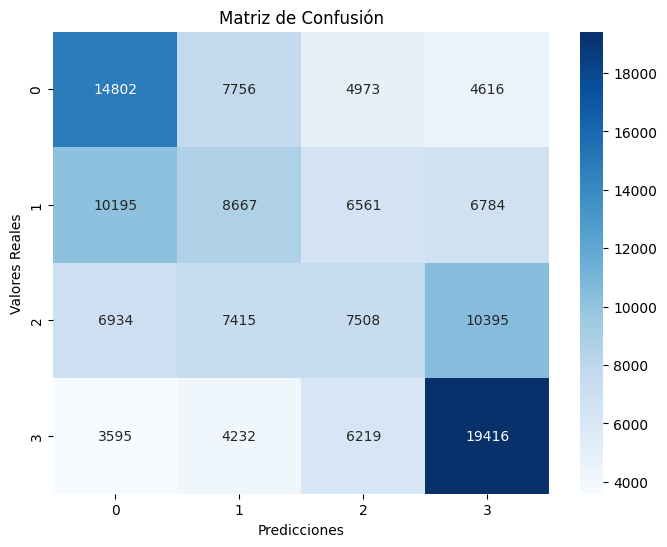

In [18]:
# Crear matriz de confusión
cm = confusion_matrix(y_val, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

In [19]:

test_data = p

X_test_data = test_data[sorted(test_data.columns)].values
print("Forma del dataset procesado:", X_test_data.shape)


Forma del dataset procesado: (296786, 36)


In [20]:
preds_test_data = best_rf.predict(X_test_data)

print("Predicciones realizadas con éxito.")
print(preds_test_data[:10])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicciones realizadas con éxito.
[0 0 0 0 0 1 0 0 0 0]


In [21]:
cmap = {
    'alto': 0,
    'bajo':1,
    'medio bajo':2,
    'medio alto':3
}

cmapi = {v:k for k,v in cmap.items()}
text_preds_test_data = [cmapi[i] for i in preds_test_data]

In [22]:
submission = pd.DataFrame([p_ids, text_preds_test_data], index=['ID', 'RENDIMIENTO_GLOBAL']).T
submission

,ID,RENDIMIENTO_GLOBAL
0,550236,alto
1,98545,alto
2,499179,alto
3,782980,alto
4,785185,alto
...,...,...
296781,496981,alto
296782,209415,alto
296783,239074,alto
296784,963852,alto


In [23]:
submission.to_csv("my_submission.csv", index=False)

In [24]:
!head my_submission.csv

ID,RENDIMIENTO_GLOBAL
550236,alto
98545,alto
499179,alto
782980,alto
785185,alto
58495,bajo
705444,alto
557548,alto
519909,alto


In [25]:
submission.shape

(296786, 2)

In [26]:
!kaggle competitions submit -c udea-ai4eng-20242 -f my_submission.csv -m "Laura Vanessa Tascón Cataño submission whit xgboost"

100% 3.48M/3.48M [00:00<00:00, 15.7MB/s]
Successfully submitted to UDEA/ai4eng 20242 - Pruebas Saber Pro Colombia